## 画瑞士卷

In [1]:
import numpy as np

In [2]:
tt0 = 3 * np.pi / 2 * (1 + 2 * np.arange(0, 1.25, 0.01))
hh = np.arange(0, 1.125, 0.125) * 30
xx = np.transpose(np.tile(np.multiply(tt0, np.cos(tt0)), (len(hh), 1)))
yy = np.tile(hh, (len(tt0), 1))
zz = np.transpose(np.tile(np.multiply(tt0, np.sin(tt0)), (len(hh), 1)))
cc = np.transpose(np.tile((tt0-tt0.min())/(tt0.max()-tt0.min()), (len(hh), 1)))

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
# %matplotlib notebook

In [28]:
sns.set_style('whitegrid')

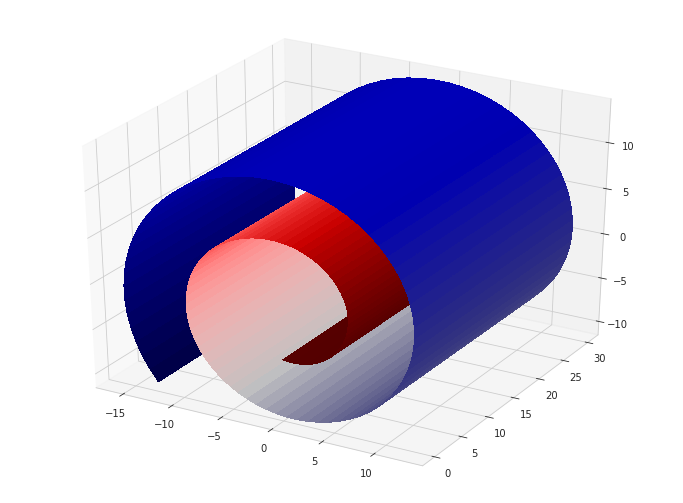

In [36]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, rstride=1, cstride=1,
                linewidth=0, antialiased=False,
                facecolors=cm.seismic_r(cc))

## 例7-2 瑞士卷上的k -均值聚类

In [40]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets
from sklearn.cluster import KMeans

In [47]:
# 生成带噪声的瑞士卷数据集
X, color = datasets.samples_generator.make_swiss_roll(n_samples=1500)

In [49]:
X.shape

(1500, 3)

In [50]:
# 使用100个k-均值簇对数据进行近似
clusters_swiss_roll = KMeans(n_clusters=100, random_state=1).fit_predict(X)

In [51]:
clusters_swiss_roll

array([ 9, 47, 96, ..., 33, 72, 66], dtype=int32)

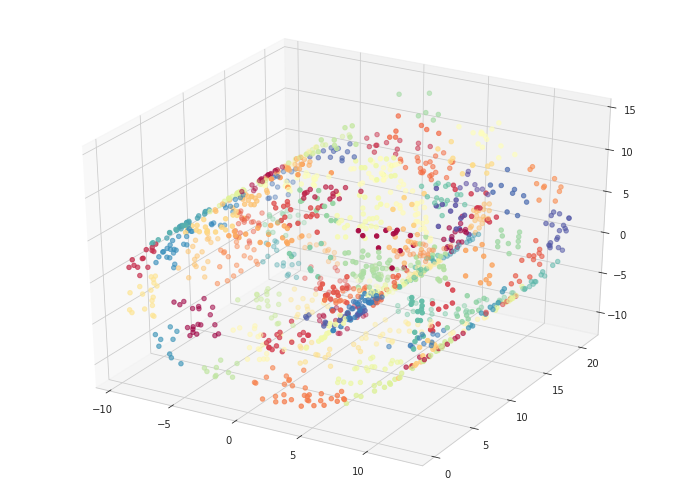

In [44]:
# 使用k-均值簇ID作为颜色来绘制数据集
fig2 = plt.figure(figsize=(12, 9))
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters_swiss_roll, cmap='Spectral')

In [46]:
fig2.savefig('./img_src/kmeans-roll100.svg')